In [16]:
# Módulo para instalar librerías faltantes y necesarias para analizar el dataset y realizar la visualización.

# pip install plotly

   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
   ---- ----------------------------------- 2.1/19.0 MB 14.7 MB/s eta 0:00:02
   ----------- ---------------------------- 5.2/19.0 MB 15.2 MB/s eta 0:00:01
   ---------------- ----------------------- 7.6/19.0 MB 13.8 MB/s eta 0:00:01
   ------------------------ --------------- 11.5/19.0 MB 14.7 MB/s eta 0:00:01
   ----------------------------------- ---- 17.0/19.0 MB 17.3 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.0 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 19.0/19.0 MB 15.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importación de bibliotecas que necesitamos para el análisis de datos.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import plotly.express as px

In [2]:
# Lectura y extracción del dataset.

# Ignore all warnings () 
warnings.filterwarnings('ignore') 

# Carga de los ficheros de datos, en nuestro caso están en .csv

crimes_df = pd.read_csv('C:/Users/le Roj/Desktop/Jupyter Notebook/Data/Crime Women India/CrimesOnWomenData.csv')
description_df = pd.read_csv('C:/Users/le Roj/Desktop/Jupyter Notebook/Data/Crime Women India/description.csv')

# Mostrar las primeras 5 filas de los ficheros.

print("CrimesOnWomenData.csv - 5 primeras  filas:")
print(crimes_df.head())

print("\nDescription.csv - 5 primeras filas:")
print(description_df.head())

CrimesOnWomenData.csv - 5 primeras  filas:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0

Description.csv - 5 primeras filas:
   Unnamed: 0 Column Names         Explanation
0           0        State               State
1           1         Year                Year
2           2         Rape   No. of Rape cases
3           3          K&A  Kidnap And Assault
4           4           DD        Dowry Deaths


In [3]:
# Crear un diccionario para renombrar las columnas

column_names = {
    'Rape': 'Casos de violación',
    'K&A': 'Secuestros y asaltos',
    'DD': 'Muertes por la dote',
    'AoW': 'Asalto a mujeres',
    'AoM': 'Asalto a menores (niñas y adolescentes)',
    'DV': 'Violencia doméstica',
    'WT': 'Brujería',
    'State' : 'Estado',
    'Year' : 'Año',
}

# Renombrar las columnas en el DataFrame.

crimes_df.rename(columns=column_names, inplace=True)

# Verificar los nombres de las columnas renombradas.

print("\nRenamed Columns:")
print(crimes_df.columns)



Renamed Columns:
Index(['Unnamed: 0', 'Estado', 'Año', 'Casos de violación',
       'Secuestros y asaltos', 'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')


In [4]:
# Quitamos las columnas que no utilizaremos en el análisis de datos y su visualización. 

crimes_df_cleaned = crimes_df.drop(columns=['Unnamed: 0'])
crimes_df_cleaned['Estado'] = crimes_df_cleaned['Estado'].str.upper()

# Verificamos la DataFrame ya limpia.

print("\nCleaned Dataset Columns:")
print(crimes_df_cleaned.columns)
print("\nFirst 5 Rows of the Cleaned Dataset:")
print(crimes_df_cleaned.head())


Cleaned Dataset Columns:
Index(['Estado', 'Año', 'Casos de violación', 'Secuestros y asaltos',
       'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')

First 5 Rows of the Cleaned Dataset:
              Estado   Año  Casos de violación  Secuestros y asaltos  \
0     ANDHRA PRADESH  2001                 871                   765   
1  ARUNACHAL PRADESH  2001                  33                    55   
2              ASSAM  2001                 817                  1070   
3              BIHAR  2001                 888                   518   
4       CHHATTISGARH  2001                 959                   171   

   Muertes por la dote  Asalto a mujeres  \
0                  420              3544   
1                    0                78   
2                   59               850   
3                  859               562   
4                   70              1763   

   

In [5]:
# Dataset info
print("\nCleaned Dataset Info:")
crimes_df_cleaned.info()

# Summary statistics
print("\nSummary Statistics:")
print(crimes_df_cleaned.describe(include='all'))
print(crimes_df_cleaned.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Estado                                   736 non-null    object
 1   Año                                      736 non-null    int64 
 2   Casos de violación                       736 non-null    int64 
 3   Secuestros y asaltos                     736 non-null    int64 
 4   Muertes por la dote                      736 non-null    int64 
 5   Asalto a mujeres                         736 non-null    int64 
 6   Asalto a menores (niñas y adolescentes)  736 non-null    int64 
 7   Violencia doméstica                      736 non-null    int64 
 8   Brujería                                 736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB

Summary Statistics:
                Estado          Año  Casos

In [6]:
print(crimes_df_cleaned.columns)


Index(['Estado', 'Año', 'Casos de violación', 'Secuestros y asaltos',
       'Muertes por la dote', 'Asalto a mujeres',
       'Asalto a menores (niñas y adolescentes)', 'Violencia doméstica',
       'Brujería'],
      dtype='object')


In [7]:
print(crimes_df_cleaned.head())


              Estado   Año  Casos de violación  Secuestros y asaltos  \
0     ANDHRA PRADESH  2001                 871                   765   
1  ARUNACHAL PRADESH  2001                  33                    55   
2              ASSAM  2001                 817                  1070   
3              BIHAR  2001                 888                   518   
4       CHHATTISGARH  2001                 959                   171   

   Muertes por la dote  Asalto a mujeres  \
0                  420              3544   
1                    0                78   
2                   59               850   
3                  859               562   
4                   70              1763   

   Asalto a menores (niñas y adolescentes)  Violencia doméstica  Brujería  
0                                     2271                 5791         7  
1                                        3                   11         0  
2                                        4                 1248         0 

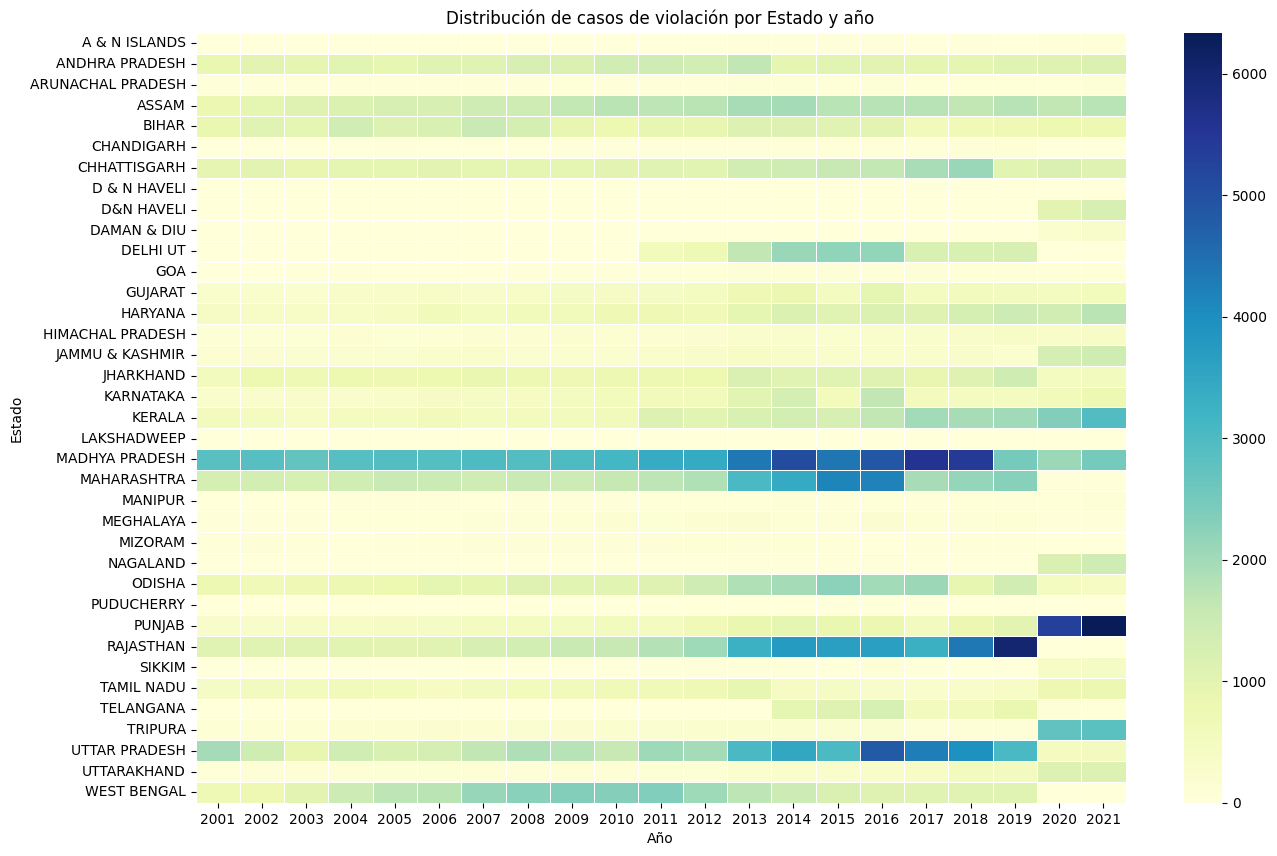

In [8]:
# Usa el nombre correcto de la columna 'Rape Cases' si es diferente
heatmap_data = crimes_df_cleaned.pivot_table(
    values='Casos de violación',  # Asegúrate de que este nombre es el correcto
    index='Estado',        # Asegúrate de que este nombre es el correcto
    columns='Año',       # Asegúrate de que este nombre es el correcto
    aggfunc='sum',
    fill_value=0
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linecolor='white', linewidths=0.5)
plt.title('Distribución de casos de violación por Estado y año')
plt.show()


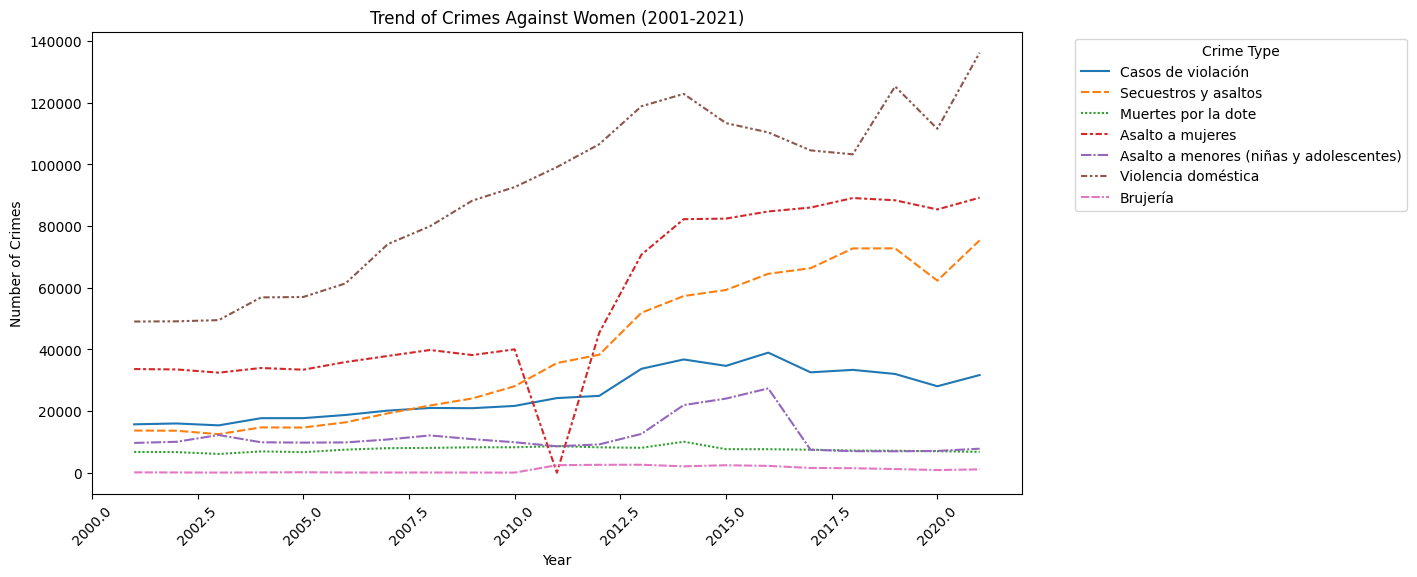

In [10]:
# Group by year and sum up all crime types
crime_trend = crimes_df_cleaned.groupby('Año').sum()

# Plotting the trend of different crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend)
plt.title('Trend of Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
print(crimes_df_cleaned_eda.columns)


NameError: name 'crimes_df_cleaned_eda' is not defined

In [18]:
import pandas as pd

# Ejemplo de DataFrame original
crimes_df_cleaned = pd.DataFrame({
    'Unnamed: 0': [1, 2, 3],
    'State': ['State1', 'State2', 'State3'],
    'Year': [2001, 2002, 2003],
    'Rape Cases': [10, 20, 30],
    # Otras columnas...
})

# Renombrar columnas
crimes_df_cleaned.rename(columns={
    'Unnamed: 0': 'Índice',
    'State': 'Estado',
    'Year': 'Año',
    'Rape Cases': 'Casos de violación'
}, inplace=True)

# Eliminar columna 'Año'
crimes_df_cleaned_eda = crimes_df_cleaned.drop(columns=['Año'])

# Verifica los nombres de las columnas
print(crimes_df_cleaned_eda.columns)


Index(['Índice', 'Estado', 'Casos de violación'], dtype='object')


In [20]:
# Total de crímenes por estado
state_crime = crimes_df_cleaned_eda.groupby('Estado').sum().sort_values(by='Casos de violación', ascending=False)

# Top 10 estados con mayor número de crímenes
top_states = state_crime.head(10)

print(top_states)


        Índice  Casos de violación
Estado                            
State3       3                  30
State2       2                  20
State1       1                  10
